In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF

# Informacion sobre validacion cruzada

- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
- https://data-flair.training/blogs/svm-kernel-functions/

In [80]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_samples=2000,
                           random_state=1, n_clusters_per_class=2)

In [4]:
import pandas as pd

In [8]:
y

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [33]:
dfX = pd.DataFrame(data=X)
dfX["clase"] = y
corr = dfX.corr()

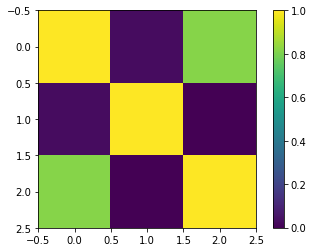

In [34]:
plt.imshow(corr)
plt.colorbar()

In [39]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0, n_samples=2000),
            make_circles(noise=0.2, factor=0.5, random_state=1, n_samples=2000),
            linearly_separable
            ]

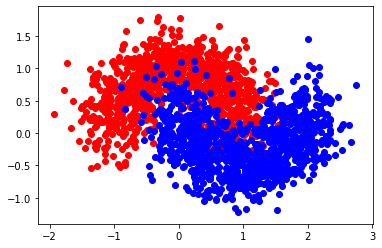

In [40]:
X_moons = datasets[0][0]
y_moons = datasets[0][1]
plt.scatter(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], c='r')
plt.scatter(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], c='b')
plt.show()

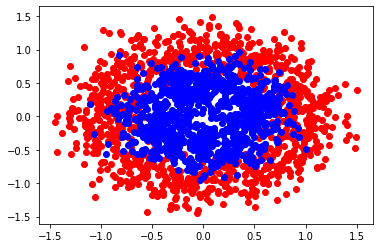

In [41]:
X_circles = datasets[1][0]
y_circles = datasets[1][1]
plt.scatter(X_circles[y_circles==0, 0], X_circles[y_circles==0, 1], c='r')
plt.scatter(X_circles[y_circles==1, 0], X_circles[y_circles==1, 1], c='b')
plt.show()

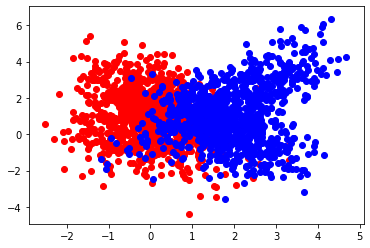

In [38]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='r')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b')
plt.show()

In [95]:
X

array([[ 0.30126162, -0.22814337],
       [-0.44210526,  0.69535258],
       [ 1.12285401, -0.90352697],
       ...,
       [ 0.86926803,  0.52024834],
       [-0.33891919, -1.78447051],
       [ 0.74034955,  0.67391179]])

In [106]:
linealSvc = SVC(kernel="linear", C=0.025)
nolinealSvc = SVC(kernel=RBF(), gamma=2, C=0.1)

In [52]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, cross_val_predict

In [55]:
scores = cross_val_score(estimator=linealSvc, X=X, y=y, cv=KFold(n_splits=10))
scores

array([0.71 , 0.76 , 0.75 , 0.725, 0.745, 0.715, 0.715, 0.71 , 0.675,
       0.69 ])

In [107]:
scores = cross_val_score(estimator=nolinealSvc, X=X, y=y, cv=KFold(n_splits=10))
scores

array([0.915, 0.955, 0.95 , 0.955, 0.96 , 0.97 , 0.945, 0.95 , 0.935,
       0.965])

In [56]:
scores = cross_val_score(estimator=linealSvc, X=X_circles, y=y_circles, cv=KFold(n_splits=10))
scores

array([0.49 , 0.465, 0.48 , 0.48 , 0.495, 0.49 , 0.48 , 0.475, 0.49 ,
       0.455])

In [94]:
scores = cross_val_score(estimator=nolinealSvc, X=X_circles, y=y_circles, cv=KFold(n_splits=10))
scores

array([0.865, 0.86 , 0.925, 0.875, 0.905, 0.88 , 0.895, 0.885, 0.89 ,
       0.87 ])

In [57]:
scores = cross_val_score(estimator=linealSvc, X=X_moons, y=y_moons, cv=KFold(n_splits=10))
scores

array([0.83 , 0.85 , 0.87 , 0.835, 0.89 , 0.83 , 0.825, 0.885, 0.815,
       0.84 ])

In [93]:
scores = cross_val_score(estimator=nolinealSvc, X=X_moons, y=y_moons, cv=KFold(n_splits=10))
scores

array([0.895, 0.88 , 0.92 , 0.905, 0.93 , 0.925, 0.915, 0.93 , 0.92 ,
       0.915])